# Exercise 1 (basic)

In this exercise you explore the most commonly used machine learning algorithms:
 - Linear Discriminant Analysis (also known as Fisher's Discriminant)
 - Decision Trees
 - Boosted Decision Trees
 - Artificial Neural Networks
 
Execute the following cells by pressing "Shift + Enter", interpret the results and answer the questions.

## The SciPy Stack

The SciPy stack is a
**Python-based ecosystem of open-source software for mathematics, science, and engineering**

### The SciPy stack includes:
 * **IPython** Interactive python shell
 * **NumPy** N-dimensional array package and data format used in SciPy
 * **Matplotlib** Plotting and data visualization
 * **SciPy** Scientific computing: Integration, Optimization, Statistics, ...
 * **Pandas** Data structures & data analysis
 * **Sympy** Symbolic mathematics
 
Furthermore the SciPy stack includes a package for machine learning called **scikit-learn** (or short sklearn).
scikit-learn is a good package to take your first steps in machine learning. Later you probably want to change to a more performant and specialized package like:
  * XGBoost (https://github.com/dmlc/xgboost) for Gradient Boosting based on Decision Trees
  * Tensorflow (https://www.tensorflow.org/) for Artificial Neural Networks

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Visualization

I already prepared two functions which create nice plots like you have seen in the lecture.
Just execute the cell.

In [5]:
def plot_data(X, y, classifier=None, show=True):
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.5, label='Signal')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.5, label='Background')
    plt.legend(loc=1, bbox_to_anchor=(0.3, 1.2))
    if classifier is not None:
        supportX = np.arange(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 0.05)
        supportY = np.arange(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 0.05)
        GX, GY = np.meshgrid(supportX, supportY)
        GZ = np.array([[float(classifier.predict_proba(np.array([[x, y]]))[:, 1]) for x in supportX] for y in supportY])
        plt.contourf(GX, GY, GZ, alpha=0.5, cmap='Greys', levels=np.linspace(GZ.min(), GZ.max(), 20))
    if show:
        plt.show()
        
def plot_roc(X, y, classifier, show=True):
    p = classifier.predict_proba(X)[:, 1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(y, p)
    auc = sklearn.metrics.roc_auc_score(y, p)
    plt.plot(1-tpr, 1-fpr, lw=3, label='AUC {:3f}'.format(auc))
    plt.legend()
    if show:
        plt.show()

## Data

In this first exercise we will work only with a 2d classification task, like you have seen in the lecture.
The next cell contains two possible toy datasets:
  1. Problem 1: Signal and Background are drawn from a gaussian distribution with different means and covariances
  2. Problem 2: Signal is drawn from a gaussian distribution and the background is an open ring around the signal
  
In an exercise further down you will be asked to change the dataset from "problem_1" to "problem_2".
You can do this by exchanging the function call in the get_data() function below.

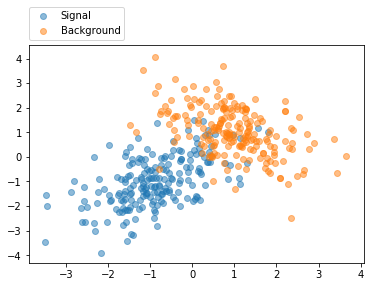

In [6]:
N = 200

def get_problem_1():
    signal = np.random.multivariate_normal([-1.0,-1.0],[[1.0,0.5],[0.5,1.0]],(N,))
    bckgrd = np.random.multivariate_normal([1.0,1.0],[[1.0,-0.5],[-0.5,1.0]],(N,))
    return signal, bckgrd

def get_problem_2():
    signal = np.random.multivariate_normal([0.0,0.0],[[2.0,1.0],[1.0,3.0]],(N,))
    r, phi = np.random.normal(3.0, size=(N,)), np.random.normal(0.0, 1, size=(N,))
    bckgrd = np.c_[r*np.cos(phi), r*np.sin(phi)]
    return signal, bckgrd

def get_data():
    X = np.vstack(get_problem_1())
    y = np.hstack([np.ones(N), np.zeros(N)])
    return X, y

X, y = get_data()
plot_data(X, y)

## Linear Discriminant Analysis

The linear discriminant analysis is probably the easiest technique you can imagine.
Strictly speaking it is not a machine learning technique, because it justs fits
a gaussian distribution to the signal and background.

All sklearn classifiers have the same interface:
  1. Import the necessary sub-package of sklearn.
  2. Create a new instance of the appropriate class (here you can set the hyper-parameters of the method, see below)
  3. Fit the instance using a training dataset X and the truth y (containing the class labels: 1 for signal and 0 for background) using the **fit** method.
  4. Infer the signal-probability of unlabelled new data using the **predict_proba** method
  
In the code below the inference part is done by the plot_roc function (see above).
We plot the ROC curve twice, once for the training dataset (in blue) and once on independent
new data we create by calling get_data() (in orange).

**Question 1** Why is this classifier called 'linear'?

**Question 2** Does the method under-fit or over-fit?

**Question 3** Is this classifier appropriate for our problem?

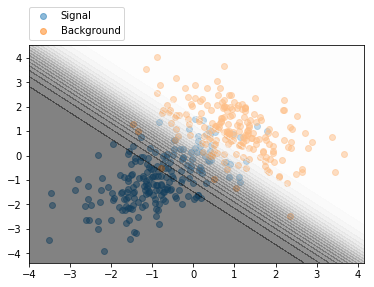

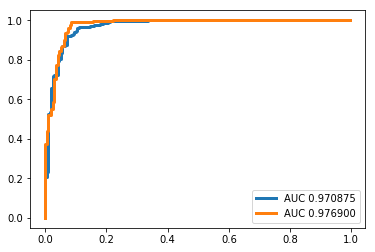

In [7]:
import sklearn.discriminant_analysis 
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X, y)
plot_data(X, y, lda)
plot_roc(X, y, lda, show=False)
plot_roc(*get_data(), lda)

## Decision Tree

Decision Trees are usually used with a boosting or bagging technique.
But they can also be used on their own.

**Question 1** Does the method under-fit or over-fit?

**Question 2** Limit the maximum depth of the tree by passing the argument "max_depth=2" to DecisionTreeClassifier() call. Which cuts did the tree apply?

**Question 3** Can you find a value of "max_depth" which yields better results than LDA?

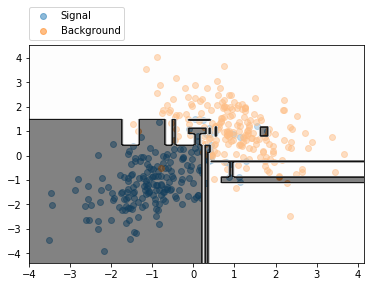

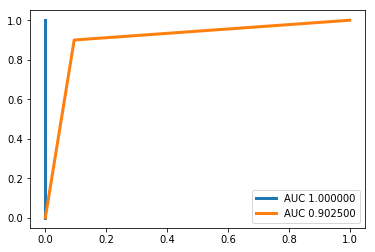

In [16]:
import sklearn.tree
dt = sklearn.tree.DecisionTreeClassifier()
dt.fit(X, y)
plot_data(X, y, dt)
plot_roc(X, y, dt, show=False)
plot_roc(*get_data(), dt)

## Gradient Boosted Decision Trees

As explained in the lecture over-fitting can be effectively prevented by averaging
many simple methods (so-called weak-learners) to obtain one robust complex model.

The GradientBoostingClassifier of sklearn offers several interesting hyper-parameters:
  - n_estimators defines the number of trees (-> boosting)
  - subsample defines the fraction of the events used for each tree (-> bagging)
  - max_depth defines the maximum depth of the individual tree
You can set these hyper-parameters like you did above in the case of the DecisionTree.
Just add the parameters e.g. "subsample=0.5" to the GradientBoostingClassifier() call

**Question 1** Does the method under-fit or over-fit. How does it perform out-of-the-box compared to a single DecisionTree

**Question 2** Play around with the above hyper-parameters. What are the optimal values?

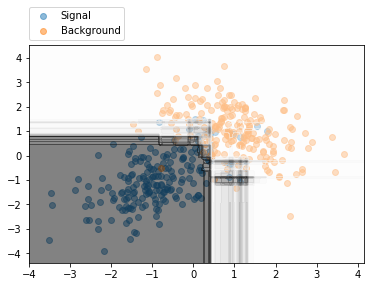

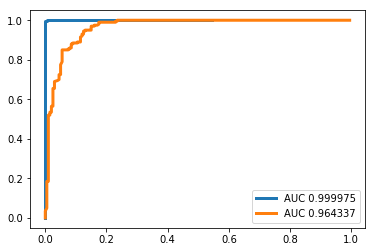

In [20]:
import sklearn.ensemble
rf = sklearn.ensemble.GradientBoostingClassifier()
rf.fit(X, y)
plot_data(X, y, rf)
plot_roc(X, y, rf, show=False)
plot_roc(*get_data(), rf)

## Artificial Neural Networks

Artificial neural networks are very hyped at the moment due to a concept called **deep learning**.
Here we restrict ourselves to **shallow learning**, that is a neural network with only one hidden layer.

Again there are many hyper-parameters you can play with:
  - hidden_layer_sizes: default is (100,). You can also set (5,5) that is a nn with two hidden layers with 5 neurons each.
  - max_iter  the number of iterations
  - batch_size the number of mini batches just per step
  - activation: the activation function possible values are "relu", "tanh", "logistic", or the "identity"
  - shuffle: whether to shuffle the samples in each iteration
  
**Question 1** Does the method under-fit or over-fit?

**Question 2** What are the optimal values for the hyper-parameters given above?

**Question 3** Activate **early stopping**. To do this have a look into the documentation of the MLPClassifier. You can do so executing "sklearn.neural_network.MLPClassifier?" in a new cell (see below). What does it do? Is there a reason not to use early stopping?

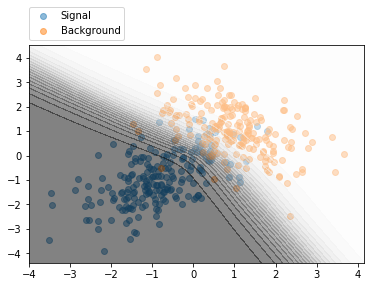

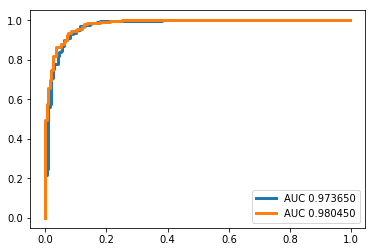

In [23]:
import sklearn.neural_network
nn = sklearn.neural_network.MLPClassifier()
nn.fit(X, y)
plot_data(X, y, nn)
plot_roc(X, y, nn, show=False)
plot_roc(*get_data(), nn)

In [24]:
sklearn.neural_network.MLPClassifier?

## Now switch to "problem_2" and do the exercises again.